<a href="https://colab.research.google.com/github/IamConstantine/MachineLearningUdemy/blob/main/regression/svr/support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [51]:
df = pd.read_csv('Position_Salaries.csv')
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [52]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [53]:
y = y.reshape(len(y), 1)

In [54]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [55]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)
y = sc_y.fit_transform(y)

In [56]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [57]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [58]:
from sklearn.svm import SVR

regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [59]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

## Visualising the SVR results

Text(0, 0.5, 'Salary')

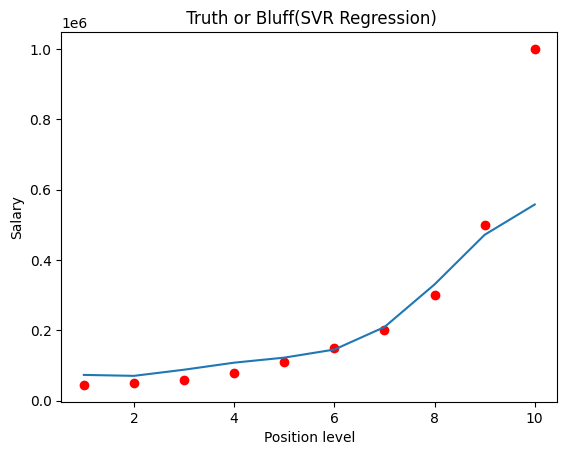

In [70]:
unscaled_X=sc_x.inverse_transform(X)
plt.scatter(unscaled_X, sc_y.inverse_transform(y), color='red')
plt.plot(unscaled_X, sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1)))
plt.title(' Truth or Bluff(SVR Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')

## Visualising the SVR results (for higher resolution and smoother curve)

In [71]:
np.arange(min(unscaled_X), max(unscaled_X), 0.1)

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4,
       7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
       8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

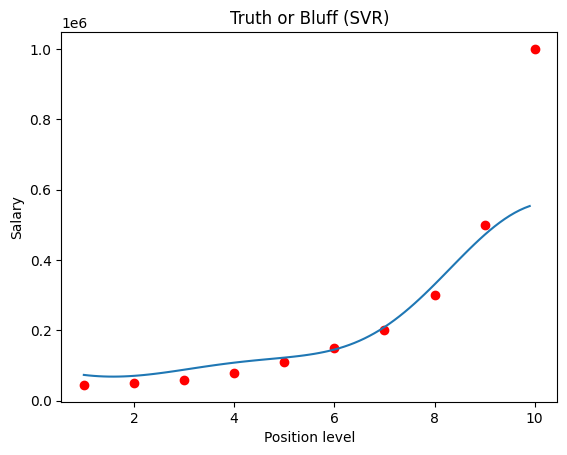

In [73]:
# instead of predicting for 10 known values from the dataset of X, we predict for all points in between two levels
# eg: Instead of predicting only for level 1 and 2, we predict for 1, 1.1 ,1.2...1.9 ,2.0.
# This way we give the notion of smooth blue line instead of jagged lines

X_grid = np.arange(min(unscaled_X), max(unscaled_X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(unscaled_X, sc_y.inverse_transform(y), color='red')

plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(X_grid)).reshape(-1, 1)))
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()